# DAY 2: Models - Exercise 3.
A major limitation of the ensemble mean is that it does not contain information on the prediction uncertaintiy <br>
In this excersice we will be: <br>

1. **Understanding the ensemble spread as an indicator of forecast uncertainty**.<br>

The data for this excersise is below - this is the same data as Ex-2 <br>
A forecasted amount of rainfall is given for each year and the months OND. 

**Remember to change the name to your location of intrest.  Example: da = location('Kenya_Hindcast')**

In [1]:
import numpy as np
import xarray as xr
from Data import location
da = location('Kenya_Hindcast')
Obs_Rain = location("Kenya_Obs_Chirps")

## Minimums and Maximums
The spread is the range of a dataset<br>
We will need to determine the minimum and maximum forecasted rainfall for each year. <br>
This will show us the **Spread** in that years members predictions. <br>
The point of this is so we can see if the forecast members are in general agreement with themselves. <br>
If the spread covers the entire range of possibilities, the forecast may offer little certainty. <br>
A smaller spread **could** suggest more certainty in the forecast.<br>
<br>
We are going to use the same principles in python that we used to calculate the Mean for each year in Ex-2.<br>
Fill in the "()" after append with the correct words out of Min and Max respecively. 


<details>
  <summary>Click for solution!</summary>
    Yearly_Forecast_Min.append(Min) <br>
    Yearly_Forecast_Max.append(Max)
</details>

In [2]:
#First we create an empty array to store the data in
Yearly_Forecast_Min = []
Yearly_Forecast_Max = []

#Then we need to select for each year all the values accosiated with it
for year in da.year.values:
    data = da.sel(year=year)
    
    #now we can use the function min and max to return the yearly min and max across the members 
    Min = data.min().item()
    Max = data.max().item()
    
    #Now we can store them into the list
    Yearly_Forecast_Min.append(Min)
    Yearly_Forecast_Max.append(Max)

    #Yearly_Forecast_Min.append( ) -edit
    #Yearly_Forecast_Max.append( ) -edit


print("Yearly_Forecast_Minimum for 1993-2016:",Yearly_Forecast_Min)
print("Yearly_Forecast_Maximum for 1993-2016:",Yearly_Forecast_Max)

Yearly_Forecast_Minimum for 1993-2016: [1.64, 3.01, 1.59, 0.9, 2.84, 1.45, 1.44, 1.25, 1.15, 1.45, 1.46, 1.59, 1.52, 2.31, 1.51, 1.42, 1.79, 1.54, 2.2, 1.7, 1.31, 1.83, 2.98, 1.23]
Yearly_Forecast_Maximum for 1993-2016: [3.28, 5.85, 3.3, 3.26, 6.38, 2.93, 3.18, 3.25, 3.45, 3.96, 3.58, 3.94, 2.71, 4.85, 3.56, 3.37, 3.62, 3.45, 4.92, 4.73, 2.79, 3.53, 5.91, 3.05]


## Quantiles
Like before we need to seperate where the data gets outside a certain bound. <br>
Before we used Terciles <br>
This time we will use quantiles <br>
Quantiles seperate data at 25% and 75%. <br>
The point of this is that we can see what the majority of the forecast is predicting. <br>
This may seem simillar to spread - but spread could be aggrivated by one anomlous ensemble member predicting far outside the normal. <br>
Important to look as is wether the obeserved rainfall is inside the spread or inside the quantiles.<br>
If the quantiles have a large diffrence - the spread is larger too. <br>
But a smaller quantile diffrence may not indicate a smaller spread. <br>
A large diffrence in the qunatiles will provide little certainty for the forecasted rainfall as it may cover a large amount of possibilites. <br>
<br>
We can calculate quantiles for the whole dataset. <br>
The first one (upper quantile) has been done for you. <br>
**Copy this style and change the black space to caculate the 25% lower quantile.** <br>
The cell will have no output when run, to check your work you must run the cell below the next


<details>
  <summary>Click for solution!</summary>
    RF_lower_quantile = np.percentile(da, 25.00) <br>
</details>

In [3]:
RF_upper_quantile = np.percentile(da, 75.00)
RF_lower_quantile = np.percentile(da, )

In [4]:
print("This is the upper quantile for all the data:", RF_upper_quantile)
print("This is the lower quantile for all thed data:", RF_lower_quantile)

This is the upper quantile for all the data: 3.2325
This is the lower quantile for all thed data: 2.04


With this principle we must now find the quantile values for each year instead of the whole dataset. <br>
Because there are multiple predictions for each year, this will tell us the general range of the forecast for that year. <br>
Just like we found the min and max for each year<br>
<br>
Using the quantiles excersice fill in the empty () like we did in the Min, Max excersice. 

<details>
  <summary>Click for solution!</summary>
    Yearly_Forecast_UQ.append(RF_upper_quantile)<br>
    Yearly_Forecast_LQ.append(RF_lower_quantile) 
</details>

In [5]:
#First we create an empty array to store the data in
Yearly_Forecast_LQ = []
Yearly_Forecast_UQ = []

#Then we need to select for each year all the values accosiated with it
for year in da.year.values:
    data = da.sel(year=year)
    
    #now we can use the functions as above to return the yearly quantiles
    RF_lower_quantile = np.percentile(data, 25.00, method = 'closest_observation')
    RF_upper_quantile = np.percentile(data, 75.00, method = 'closest_observation')
    
    #Now we can store them into the list
    Yearly_Forecast_UQ.append() #Edit Here
    Yearly_Forecast_LQ.append() #Edit Here

#Finally we round the values in the list for easy readability 
Yearly_Forecast_LQ = np.round(Yearly_Forecast_LQ,3)
Yearly_Forecast_UQ = np.round(Yearly_Forecast_UQ,2)
print("Yearly_Forecast_LQ for 1993-2016:",Yearly_Forecast_LQ)
print("Yearly_Forecast_UQ for 1993-2016:",Yearly_Forecast_UQ)

Yearly_Forecast_LQ for 1993-2016: [2.02 3.4  2.04 1.54 4.5  1.86 1.72 1.58 1.84 2.46 2.03 2.33 1.68 3.39
 2.03 1.6  2.26 1.98 2.84 2.12 1.44 2.29 3.47 1.99]
Yearly_Forecast_UQ for 1993-2016: [2.59 4.95 2.67 1.93 5.24 2.29 2.43 2.61 2.7  3.13 2.95 3.05 2.49 4.29
 2.93 2.35 2.99 2.64 3.52 3.34 2.19 2.97 4.32 2.6 ]


## Excersice 2
We will now need some results from ex-2. <br>
This will be used for comparison<br>
Specifically, we will be needing the Observed Rainfall and the Ensemble mean for each year.<br>
For clarity - this is the data under the subheadings **Observed Rainfall** and **Mean Per Year** in Ex-2 <br>
<br>
We want this so that we can plot, 
1. what was forecasted, 
2. what spread it had,
3. what the average range of the forecast was
4. and if the observed rainfall matches this.

Below is a repeat of how we got these in Ex-2; The cell below must be run.

In [6]:
Obs_Rain =  Obs_Rain

#First we create an empty array to store the data in
Yearly_Forecast_mean = []

#Then we need to select for each year all the values accosiated with it
for year in da.year.values:
    data = da.sel(year=year)
    #now we can use the function mean to return the yearly mean across the members 
    mean = data.mean().item()
    #Now we can store them into the list
    Yearly_Forecast_mean.append(mean)
    #print(f"{year}: {round(mean, 2)}")

#Finally we round the values in the list for easy readability 
Yearly_Forecast_mean = np.round(Yearly_Forecast_mean,2)


print("This is the averaged Observed Rainfall for OND each year:", Obs_Rain)
print("This is the averaged Forecasted Rainfall for OND each year:", Yearly_Forecast_mean)


This is the averaged Observed Rainfall for OND each year: [1.68, 3.1, 2.04, 1.54, 5.85, 1.23, 2.17, 2.09, 2.04, 2.91, 1.92, 2.3, 1.1, 4.4, 1.75, 1.8, 2.57, 1.48, 3.68, 2.64, 2.07, 2.15, 3.09, 1.72]
This is the averaged Forecasted Rainfall for OND each year: [2.42 4.3  2.4  1.83 4.84 2.14 2.13 2.23 2.28 2.78 2.55 2.74 2.13 3.83
 2.47 2.12 2.74 2.33 3.37 3.02 2.   2.67 4.07 2.26]


## Plotting
We now have:<br>
1. The Minumum and Maximum Forecasted Rainfall for each year (Range)
2. The Upper and Lower Quantiles for each year. (Spread)
3. The Observed Rainfall 
4. The averaged Forecasted Rainfall <br><br>

From this we can plot all that data in one go.<br>
With the Range of the quantiles we can see if the forecast has a large varaition in its predidiction. <br>
Is it precise or does it get the observed value correct just by covering a large range? <br>
With the Spread we can see the same thing but with outliers included. <br>
Is one ensemble member very far off but the rest are very close to the obeserved value? Does one ensemble member get it correct but the others are off? <br>
The quantiles will tell you if a data point chosen at random it is likely to fall in this range. <br>
For a forecast to often be accurate the observed data will need to be within this quantile boundary.
<br>
<br>
**As Time goes on the Averaged Forecast Value should get closer to the observed as forecast methods have improved**<br>
**You can also see that an Average value is normally better than having just one members forecast**

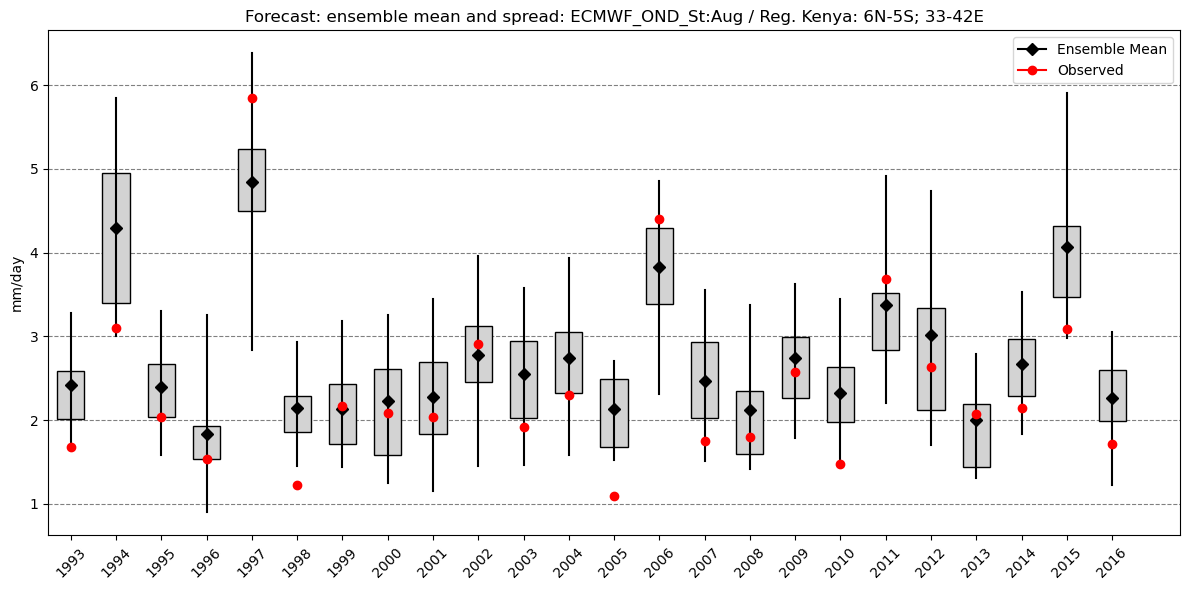

In [7]:
import matplotlib.pyplot as plt
import numpy as np


years = da.year.values
observed = Obs_Rain
ensemble_mean = Yearly_Forecast_mean
min_forecast = Yearly_Forecast_Min
max_forecast = Yearly_Forecast_Max
lower_quartile = Yearly_Forecast_LQ
upper_quartile = Yearly_Forecast_UQ

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot box plots manually using quartiles and whiskers
for i, year in enumerate(years):
    # Draw the box (IQR) in grey
    ax.add_patch(plt.Rectangle((year - 0.3, lower_quartile[i]), 0.6, upper_quartile[i] - lower_quartile[i],
                               edgecolor='black', facecolor='lightgrey'))
    # Draw the whiskers (range)
    ax.plot([year, year], [min_forecast[i], max_forecast[i]], color='black')
    # Draw the ensemble mean as a black diamond (mean value)
    ax.plot(year, ensemble_mean[i], marker='D', color='black', label='Ensemble Mean' if i == 0 else "")
    # Draw the observed value as a black circle (Obs_rain)
    ax.plot(year, observed[i], marker='o', color='red', label='Observed' if i == 0 else "")


ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.set_ylabel('mm/day')
ax.set_title('Forecast: ensemble mean and spread: ECMWF_OND_St:Aug / Reg. Kenya: 6N-5S; 33-42E')
ax.set_xlim([1992.5, 2017.5])
#ax.set_ylim([0, 7])
ax.legend()

plt.tight_layout()
plt.show()


# You have now finished EX 3; Please refer to the powerpoint on what to do next. 
## Copy the image of the plot into the powerpoint 